In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1lClKCRILD0AwA0p_iwcizl4ernv3OMRC/Final_Project


In [ ]:
import pandas as pd
import os
import xlrd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io.wavfile as wavfile
from scipy.signal import butter, lfilter, freqz
import librosa
import librosa.display
import cv2

In [ ]:
def butter_lowpass_filter(cutoff_L, fs, order):
  nyq = 0.5 * fs
  normal_cutoff = cutoff_L / nyq
  b, a = butter(order, normal_cutoff, btype='low', analog=False)
#  y = lfilter(b, a, data)
  return a, b
def butter_highpass_filter(cutoff_H, fs, order):
  nyq = 0.5*fs
  normal_cutoff = cutoff_H/nyq
  b, a = butter(order, normal_cutoff, btype='high', analog=False)
  return a, b


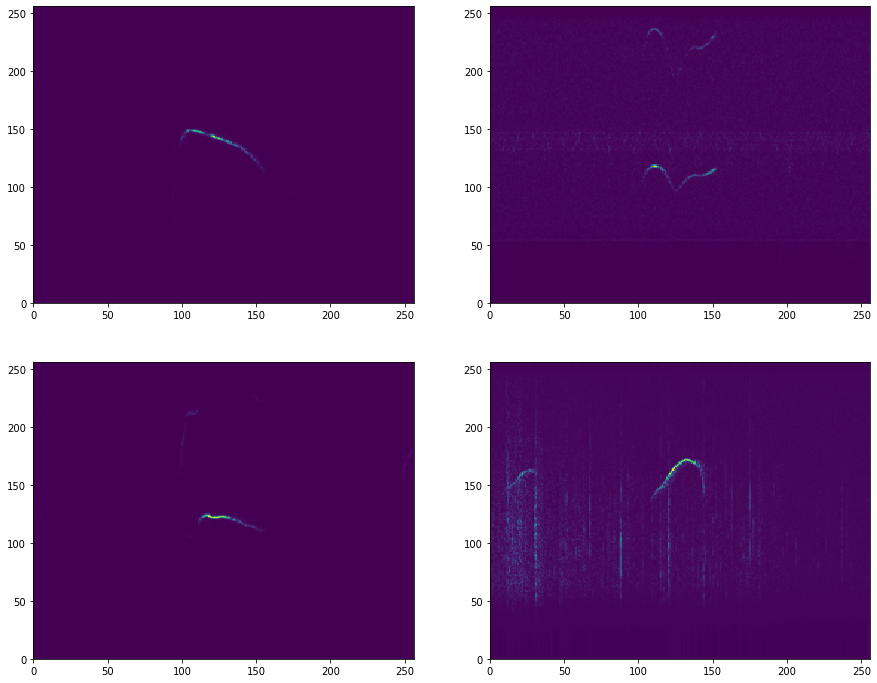

In [ ]:
path1 = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/Data_United_Syllables/syllable4'
path2 = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/Data_United_Syllables/syllable1600'
path3 = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/Data_United_Syllables/syllable2900'
path4 = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/Data_United_Syllables/syllable4564'
sr=250000
rec1, sr = librosa.load(path1, sr=sr)
rec2, sr = librosa.load(path2, sr=sr)
rec3, sr = librosa.load(path3, sr=sr)
rec4, sr = librosa.load(path4, sr=sr)
rec1 = rec1-np.mean(rec1)
rec2 = rec2-np.mean(rec2)
rec3 = rec3-np.mean(rec3)
rec4 = rec4-np.mean(rec4)

fs = sr
order = 6
cutoff_L = 120*10**3 # desired cutoff frequency of the filter, Hz
a, b = butter_lowpass_filter(cutoff_L, fs, order)
order = 6
cutoff_H = 30*10**3
c, d = butter_highpass_filter(cutoff_H, fs, order)

rec1 = lfilter(b, a, rec1)
rec1 = lfilter(d, c, rec1)
rec2 = lfilter(b, a, rec2)
rec2 = lfilter(d, c, rec2)
rec3 = lfilter(b, a, rec3)
rec3 = lfilter(d, c, rec3)
rec4 = lfilter(b, a, rec4)
rec4 = lfilter(d, c, rec4)
D1 = np.abs(librosa.stft(rec1, n_fft=2048, hop_length=128, win_length=512, window='hamming'))
D2 = np.abs(librosa.stft(rec2, n_fft=2048, hop_length=128, win_length=512, window='hamming'))
D3 = np.abs(librosa.stft(rec3, n_fft=2048, hop_length=128, win_length=512, window='hamming'))
D4 = np.abs(librosa.stft(rec4, n_fft=2048, hop_length=128, win_length=512, window='hamming'))
D1 = cv2.resize(D1, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
D2 = cv2.resize(D2, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
D3 = cv2.resize(D3, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
D4 = cv2.resize(D4, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
ax[0, 0].pcolormesh((D1))
ax[0, 1].pcolormesh((D2))
ax[1, 0].pcolormesh((D3))
ax[1, 1].pcolormesh((D4))

In [ ]:
#data_table1 = xlrd.open_workbook('Total_Data.xlsx').sheet_by_index(0)
#syllable1 = data_table.col_values(14, 1)
%cd /content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/
data_table2 = xlrd.open_workbook('goldStandarts_2020_united.xlsx').sheet_by_index(0)
syllable2 = data_table2.col_values(8, 0)


/content/drive/.shortcut-targets-by-id/1lClKCRILD0AwA0p_iwcizl4ernv3OMRC/Final_Project/E:


In [ ]:
%cd /content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/Data_United_Syllables_new/
Data_united_new = []
sr = 250000
for i in range(len(syllable2)):
  path = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/Data_United_Syllables_new/syllable{}'.format(i)
  if not os.path.exists('{}'.format(path)):
    del syllable2[i]
    continue
  rec, rate = librosa.load(path, sr)
  #pre processing
#  rec = rec - np.mean(rec) #DC removal
#  rec = lfilter(b, a, rec) #lpf
  rec = lfilter(d, c, rec) #hpf
  #STFT creation
  D = np.abs(librosa.stft(rec, n_fft=2048, hop_length=128, win_length=512, window='hamming')) #creating stft and using absolute value for spectrogram
  #D = D - 0.02*np.mean(D)
  D = cv2.resize(D, dsize=(96, 96), interpolation=cv2.INTER_CUBIC) #resizing the spectograms for usage in the model. INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood
  Data_united_new.append(D) #adding spectrogram to the list



/content/drive/.shortcut-targets-by-id/1lClKCRILD0AwA0p_iwcizl4ernv3OMRC/Final_Project/E:/Data_United_Syllables_new


In [ ]:
#Data_united_new_arr = np.array(Data_united_new)
#Labels_united_new_arr = np.array(syllable)
%cd /content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/
np.save('Data_united_96_18072021', Data_united_new)
#np.save('Labels_united_new_128', syllable2)

/content/drive/.shortcut-targets-by-id/1lClKCRILD0AwA0p_iwcizl4ernv3OMRC/Final_Project/E:


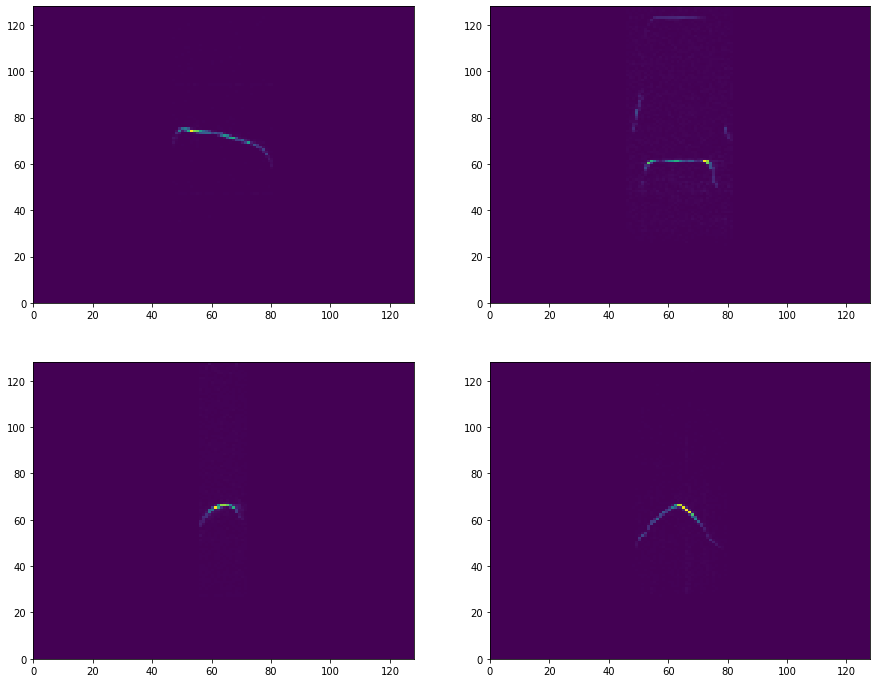

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
ax[0, 0].pcolormesh(Data_united_new[15])
ax[0, 1].pcolormesh(Data_united_new[1000])
ax[1, 0].pcolormesh(Data_united_new[2532])
ax[1, 1].pcolormesh(Data_united_new[5006])